<a href="https://colab.research.google.com/github/Hustle573/King_County_Price_Prediction/blob/master/prediction%20models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **BUSINESS FORECASTING CIA 2**
#### NAME: Allen Denny
#### Roll number: 2127708 

## **DOMAIN**
### In recent years, homelessness in New York City has reached the highest levels since the Great Depression of the 1930s. In June 2022, there were 50,287 homeless people, including 15,866 homeless children, sleeping each night in New York City’s main municipal shelter system. A near-record 18,832 single adults slept in shelters each night in June 2022. Over the course of City Fiscal Year 2021, 107,510 different homeless adults and children slept in the New York City Department of Homeless Services (DHS) shelter system. This includes 31,947 homeless children. The New York Department of Homeless Services aims at providing homeless people permanent homes and reducing the number of people taking shelter at the DHS(Department of Homeless Services).   

# **THE DATASET**
### The dataset consists of the number of homeless people who have taken shelter  at the DHS. The dataset contains the data of number of adults, children, families who have taken shelter at the DHS from August 2013 to July 2018. The data is a time series data as the data was collected on a daily basis by the DHS. The data had no null values and had only date and numerical values in all columns. The number of families with children was used for this mini project to forecast the numbers in the coming future.

**DATASET SOURCE:** https://data.world/city-of-ny/k46n-sa2m/workspace/file?filename=dhs-daily-report-1.csv

# **PROBLEM STATEMENT**
### To forecast the number of families with children who will be applying for shelter at the DHS in the future. Determining the right forecasting technique also becomes a part of the problem. The forecasted number can be used for determining the number of houses the department has to look for and also gives information to the government for bringing policies that will reduce the burden of rents and taxes on financially weak New Yorkers.


# **EVIDENCE TO SUPPORT THE PROBLEM STATEMENT**






*   New York City faces the challenge of an ever-increasing homeless population with almost 60,000 people currently living in city shelters. In a study conducted in 2015,approximately 25% of families stayed longer than nine months in a shelter, and 17% of families with children that exited a homeless shelter returned to the shelter system within 30 days of leaving.


*   New York City has one of the largest homeless populations, with more 
than 127,000 people sleeping in its shelter system at some point during fiscal year (FY) 2016, and approximately 60,000 living in shelters on any given night.


*  The significant shortage of affordable housing in New York City continues to be the main reason for family homelessness. New York City’s housing market is tight, with a citywide rental vacancy rate of 3.63% in 2017.


*   This suggests that “long-term” shelter residents and those that re-enter shelters contribute significantly to the rise of the homeless population living in city shelters and indicate systemic challenges to finding adequate permanent housing.

 








# **VARIABLE CHOSEN**

From the evidences that were shown to support the problem statement, one of the main attribute that affected the enrolment rate was families with children in shelter. This was used for the further analysis and forecasting as well.


# **TECHNIQUES USED FOR FORECASTING**

In this project, three techniques were used to perform frecasting of the number of families with children who will be homeless in the coming years.

They are: 


1.   Simple Exponential Smoothing
2.   Double Exponential Smoothing
3.   ARIMA





# **ARIMA**
The ARIMA model predicts a given time series based on its own past values. It can be used for any nonseasonal series of numbers that exhibits patterns and is not a series of random events. For example, sales data from a clothing store would be a time series because it was collected over a period of time. One of the key characteristics is the data is collected over a series of constant, regular intervals. A modified version can be created to model predictions over multiple seasons. 

An ARIMA model has three component functions: AR (p), the number of lag observations or autoregressive terms in the model; I (d), the difference in the nonseasonal observations; and MA (q), the size of the moving average window. An ARIMA model order is depicted as (p,d,q) with values for the order or number of times the function occurs in running the model. Values of zero are acceptable.

The ARIMA model uses differenced data to make the data stationary, which means there’s a consistency of the data over time. This function removes the effect of trends or seasonality, such as market or economic data.

Seasonality occurs when data exhibits predictable, repeating patterns. It is critical to control for seasonality because it could impact the accuracy of the results.

ARIMA models can be built using seasonal and nonseasonal formats. A seasonal model must take into account the number of events in each season in addition to the autoregressive, differencing and average terms for each season.

**The code below shows the ARIMA model built for the dataset that is chosen.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
from statsmodels.tsa.api import (kpss, adfuller, 
                                 seasonal_decompose, STL)
from statsmodels.tools.eval_measures import  rmse
from statsmodels.tsa.stattools import acf, pacf

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from itertools import product
import statsmodels as sm
warnings.filterwarnings('ignore')

**Reading the Dataset**

In [ ]:
# Reading life expectancy data

data = pd.read_csv("/content/dhs-daily-report-1.csv",index_col="Date of Census",parse_dates=True)
data.head()


,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
Date of Census,,,,,,,,,,,,
2013-08-21,28359,21314,49673,7231,2710,9941,10261,14607,21314,35921,1796,3811
2013-08-22,28366,21324,49690,7201,2716,9917,10274,14622,21324,35946,1803,3827
2013-08-23,28257,21291,49548,7149,2671,9820,10266,14611,21291,35902,1802,3826
2013-08-26,28485,21392,49877,7252,2704,9956,10307,14688,21392,36080,1809,3841
2013-08-27,28414,21322,49736,7209,2713,9922,10277,14640,21322,35962,1813,3852


Since we need only the number of families with children who are seeking shelter at the DHS, we can create a datafram with only the date and the number.

In [ ]:
data1 = pd.DataFrame(data,columns=['Families with Children in Shelter'])
data1


,Families with Children in Shelter
Date of Census,
2013-08-21,10261
2013-08-22,10274
2013-08-23,10266
2013-08-26,10307
2013-08-27,10277
...,...
2018-07-21,12321
2018-07-22,12315
2018-07-23,12285


**Visualizing the data**

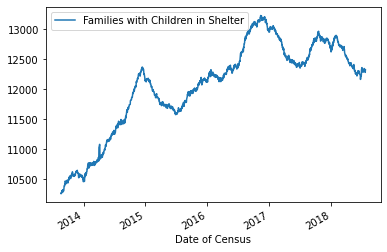

In [ ]:
data1.plot()


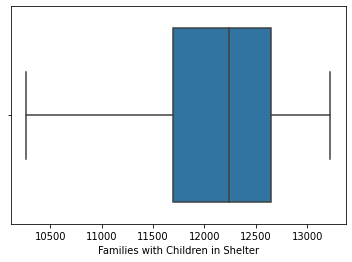

In [ ]:
# Box Plot
import seaborn as sns
sns.boxplot(data1['Families with Children in Shelter'])

We then move to decomposing the data to check if the data has a trend and seasonal component. 

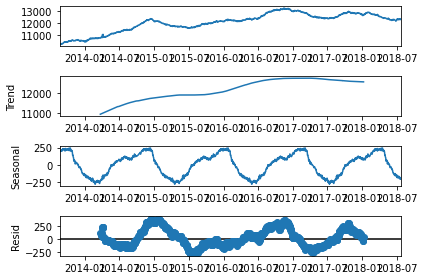

In [ ]:
# Components of the Time series
decomposed = seasonal_decompose(data1,period=400)
decomposed.plot();
plt.show()

**ADF TEST- test for stationarity**

In [ ]:
# Stationarity test
series = data1.loc[:, 'Families with Children in Shelter'].values
result = adfuller(series, autolag='AIC')
dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in result[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

Test Statistic                   -2.139447
p-value                           0.228951
Lags Used                        22.000000
Number of Observations Used    1728.000000
Critical Value (1%)              -3.434140
Critical Value (5%)              -2.863214
Critical Value (10%)             -2.567661
dtype: float64
Failed to Reject Ho - Time Series is Non-Stationary


Checking the ACF and PACF plot to check if there is seasonality.

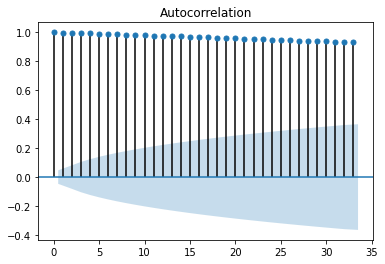

In [ ]:
plot_acf(data1['Families with Children in Shelter'])
plt.show()

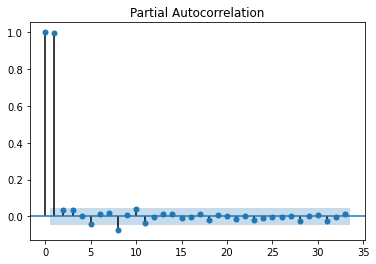

In [ ]:
plot_pacf(data1['Families with Children in Shelter'])

No seasonality in the plots. We can difference it to check stationarity again.

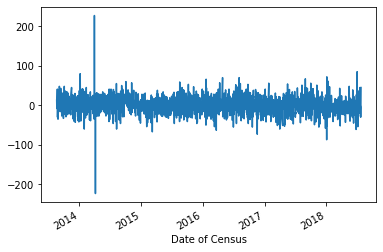

In [ ]:
data_dif_1= data1['Families with Children in Shelter'].diff(1).dropna()
data_dif_1.plot()


In [ ]:
data_dif_1.replace([np.inf, -np.inf], np.nan, inplace=True)
  
# Dropping all the rows with nan values
data_dif_1.dropna(inplace=True)
  
# Printing df
data_dif_1

Date of Census
2013-08-22    13.0
2013-08-23    -8.0
2013-08-26    41.0
2013-08-27   -30.0
2013-08-28     7.0
              ... 
2018-07-21    -1.0
2018-07-22    -6.0
2018-07-23   -30.0
2018-07-24    -7.0
2018-07-25    45.0
Name: Families with Children in Shelter, Length: 1750, dtype: float64

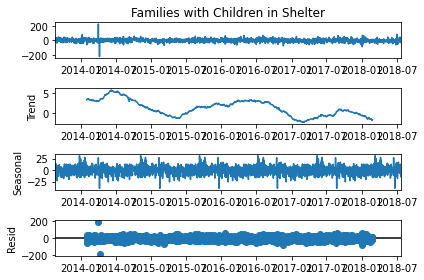

In [ ]:
decomposed = seasonal_decompose(data_dif_1,period=300)
decomposed.plot();
plt.show()

In [ ]:
# Stationarity test
series = data_dif_1.values
result = adfuller(series, autolag='AIC')
dfoutput = pd.Series(result[0:4], index=['Test Statistic','p-value','Lags Used','Number of Observations Used'])
for key,value in result[4].items():
        dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)
if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

Test Statistic                -6.385125e+00
p-value                        2.173743e-08
Lags Used                      2.100000e+01
Number of Observations Used    1.728000e+03
Critical Value (1%)           -3.434140e+00
Critical Value (5%)           -2.863214e+00
Critical Value (10%)          -2.567661e+00
dtype: float64
Reject Ho - Time Series is Stationary


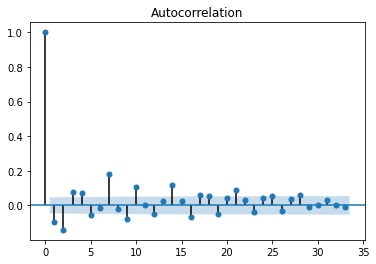

In [ ]:
plot_acf(data_dif_1)
plt.show()

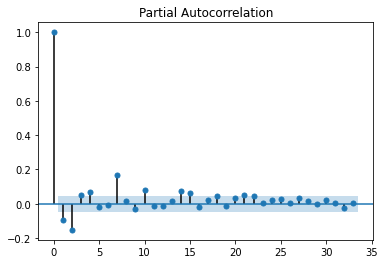

In [ ]:
plot_pacf(data_dif_1)
plt.show()

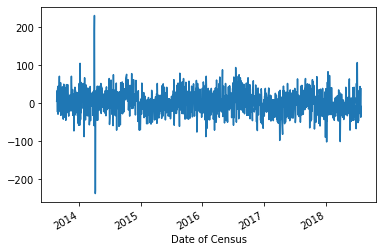

In [ ]:
data_dif_2= data1['Families with Children in Shelter'].diff(2).dropna()
data_dif_2.plot()

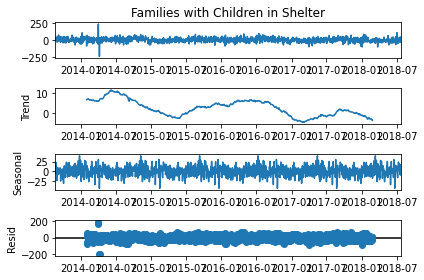

In [ ]:
decomposed = seasonal_decompose(data_dif_2,period=300)
decomposed.plot();
plt.show()

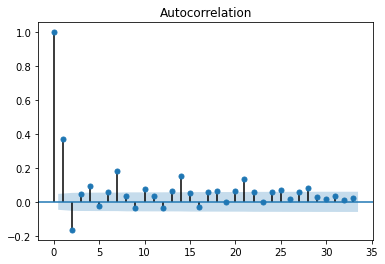

In [ ]:
plot_acf(data_dif_2)
plt.show()

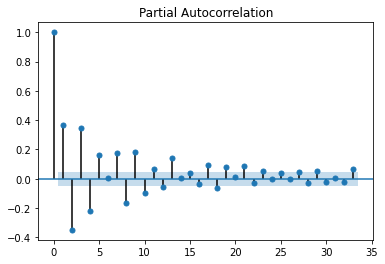

In [ ]:
plot_pacf(data_dif_2)
plt.show()

# **ARIMA Model building**

In [ ]:
# building the ARIMA Model 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.stats.diagnostic import acorr_ljungbox
model = ARIMA(data['Families with Children in Shelter'], order=(2,2,1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:     Families with Children in Shelter   No. Observations:                 1751
Model:                                ARIMA(2, 2, 1)   Log Likelihood               -7922.786
Date:                               Sun, 04 Sep 2022   AIC                          15853.572
Time:                                       16:59:58   BIC                          15875.439
Sample:                                            0   HQIC                         15861.656
                                              - 1751                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1475      0.020     -7.433      0.000      -0.186      -0.109
ar.L2         -0.1898      0.021     -8.956      0.000      -0.231      -0.148
ma.L1         -0.9714      0.006   -172.134      0.000      -0.982      -0.960
sigma2       502.5718      7.288     68.963      0.000     488.288     516.855
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              8802.85
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                            -0.19
Prob(H) (two-sided):                  0.05   Kurtosis:                        13.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Checking the residual plot.

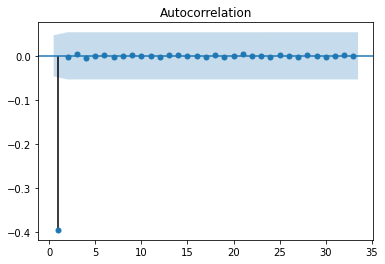

In [ ]:
plot_acf(results.resid, zero=False);plt.show()

Splitting data into test and train

In [ ]:
# Creating test and training data
def split_data(df, test_split=0.2):
    n = int(len(df) * test_split)
    train, test = df[:-n], df[-n:]
    return train, test

train, test = split_data(data1, 0.2)
print(train.tail())
print(test.tail())


                Families with Children in Shelter
Date of Census                                   
2017-08-03                                  12424
2017-08-04                                  12429
2017-08-05                                  12444
2017-08-06                                  12464
2017-08-07                                  12462
                Families with Children in Shelter
Date of Census                                   
2018-07-21                                  12321
2018-07-22                                  12315
2018-07-23                                  12285
2018-07-24                                  12278
2018-07-25                                  12323


In [ ]:
start = len(train)
end = len(train) + len(test) - 1
print(start, end)


1401 1750


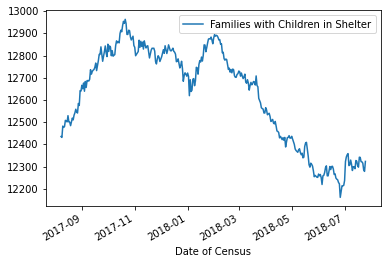

In [ ]:
test.plot()

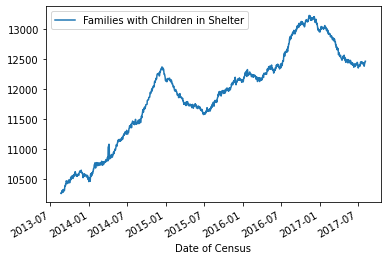

In [ ]:
train.plot()

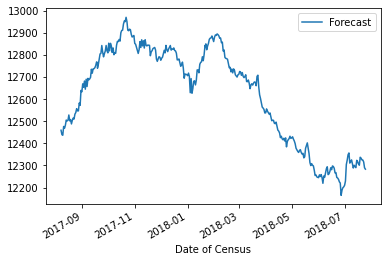

In [ ]:
predictions = results.predict(start, end,
                             typ = 'levels').rename("Forecast")
predictions.plot(legend = True)


Plotting forecast, train and test data.

[]

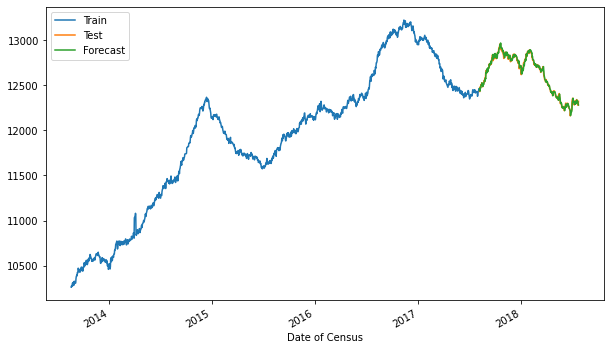

In [ ]:
#forecast = pd.DataFrame(model.forecast(test.shape[0]), index=test.index)
train['Families with Children in Shelter'].plot(legend=True, label='Train', figsize=(10,6))
test['Families with Children in Shelter'].plot(legend=True, label='Test')
predictions.plot(legend = True)
plt.plot()

Checking RMSE of ARIMA

In [ ]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test,predictions))

22.98022410758401

**Mean Absolute Percentage Error**

In [ ]:
x=0
for i in range(350):
  x=x+abs((test['Families with Children in Shelter'][i]-predictions[i])/predictions[i])
MAPE=(1/test.count())*x
MAPE*100

Families with Children in Shelter    0.13858
dtype: float64

In [ ]:
predictions2 = results.predict(start, 2500,
                             typ = 'levels').rename("Forecast")
predictions2.plot(legend = True)


# **DOUBLE EXPONENTIAL SMOOTHING**

This process is also known as second-order exponential smoothing or Holt's trend correction. When there is no seasonal pattern and the data exhibits a linear trend, this method is used to forecast the time series. The main goal of double exponential smoothing is to include a factor that accounts for the potential for a series to exhibit some sort of trend. Through exponential smoothing, this slope component is also updated.

The double exponential smoothing formulas are given by:

S1 = x1

B1 = x1-x0

For t>1,

st = αxt + (1 – α)(st-1 + bt-1)

βt = β(st – st-1) + (1 – β)bt-1

Here,

st = smoothed statistic, it is the simple weighted average of current observation xt

st-1 = previous smoothed statistic

α = smoothing factor of data; 0 < α < 1

t = time period

bt = best estimate of trend at time t

β = trend smoothing factor; 0 < β <1

**The code below shows the implementation of DES in python**

In [ ]:
data2=pd.read_csv("/content/dhs-daily-report-1.csv")
data2.head()

,Date of Census,Total Adults in Shelter,Total Children in Shelter,Total Individuals in Shelter,Single Adult Men in Shelter,Single Adult Women in Shelter,Total Single Adults in Shelter,Families with Children in Shelter,Adults in Families with Children in Shelter,Children in Families with Children in Shelter,Total Individuals in Families with Children in Shelter,Adult Families in Shelter,Individuals in Adult Families in Shelter
0,08-21-2013,28359,21314,49673,7231,2710,9941,10261,14607,21314,35921,1796,3811
1,08-22-2013,28366,21324,49690,7201,2716,9917,10274,14622,21324,35946,1803,3827
2,08-23-2013,28257,21291,49548,7149,2671,9820,10266,14611,21291,35902,1802,3826
3,08-26-2013,28485,21392,49877,7252,2704,9956,10307,14688,21392,36080,1809,3841
4,08-27-2013,28414,21322,49736,7209,2713,9922,10277,14640,21322,35962,1813,3852


In [ ]:
data3 = pd.DataFrame(data,columns=['Families with Children in Shelter'])
data3.head()

,Families with Children in Shelter
Date of Census,
2013-08-21,10261
2013-08-22,10274
2013-08-23,10266
2013-08-26,10307
2013-08-27,10277


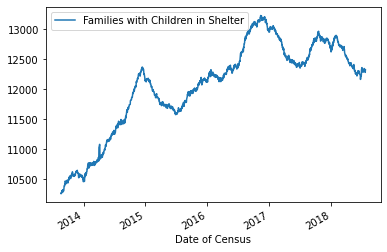

In [ ]:
data3.plot()

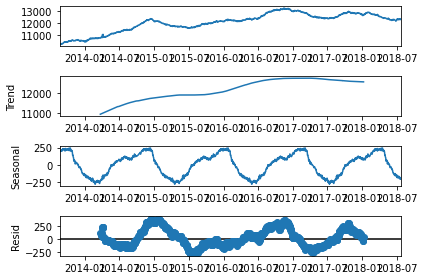

In [ ]:
# Components of the Time series
decomposed = seasonal_decompose(data3,period=400)
decomposed.plot();
plt.show()

In [ ]:
data3.count()

Families with Children in Shelter    1751
dtype: int64

In [ ]:
n=data3['Families with Children in Shelter'].count()-3
level=[0,10274]
trend=[0,7]
forecast=[0,0]
error=[0,0,0]
for i in range(2,1751):
  level.append(((data3['Families with Children in Shelter'][i])*0.2)+(0.8*(trend[i-1]+level[i-1])))
  trend.append((0.3*(level[i]-level[i-1]))+(0.7*trend[i-1]))
  forecast.append(level[i*1]+(1*trend[i-1]))
for j in range(3,1751):
  error.append(((forecast[i]-data3['Families with Children in Shelter'][i])**2)/1748)
math.sqrt(sum(error))

24.9746221197859

Plotting test and forecasted values

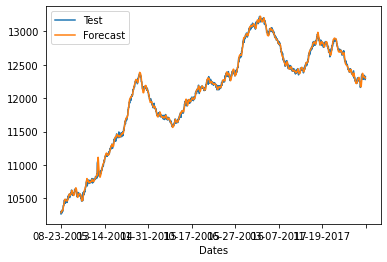

In [ ]:
test=[]
dates=[]
for i in range(2,1751):
  test.append(data3['Families with Children in Shelter'][i])
  dates.append(data2['Date of Census'][i])
forecasted=forecast[2:1751]
len(forecasted)

df=pd.DataFrame({"Dates":dates,"Forecast":forecasted,"Test":test})
df.plot(x="Dates", y=["Test", "Forecast"])
plt.show()

## **SIMPLE EXPONENTIAL SMOOTHING**

The simplest of the exponentially smoothing methods is naturally called simple exponential smoothing (SES)13. This method is suitable for forecasting data with no clear trend or seasonal pattern. 

Formula for SES:
st = αxt+(1 – α)st-1= st-1+ α(xt – st-1)
Here,

st = smoothed statistic, it is the simple weighted average of current observation xt

st-1 = previous smoothed statistic

α = smoothing factor of data; 0 < α < 1

t = time period

**The code below shows the implementation of SES in python**

In [ ]:
n=data1['Families with Children in Shelter'].count()-3
ses=[0,10274]
error=[0,0,0]
for i in range(2,1751):
  ses.append(((data3['Families with Children in Shelter'][i])*0.8)+(ses[i-1]*0.2))
  error.append(((data3['Families with Children in Shelter'][i]-ses[i-1])**2)/n)
rmse=math.sqrt(sum(error))  
rmse

22.939599756740662

Plotting forecasted and test values

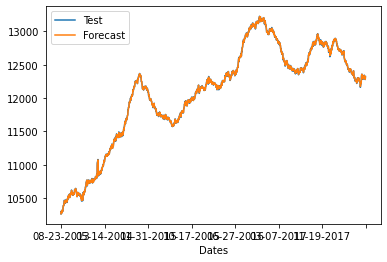

In [ ]:
df1=pd.DataFrame({"Dates":dates,"Forecast":ses[2:1751],"Test":test})
df1.plot(x="Dates", y=["Test", "Forecast"])
plt.show()

# **COMPARISON BETWEEN MODELS**

RMSE ARIMA: 22.98022410758401

RMSE DES: 24.9746221197859

RMSE SES: 22.939599756740662


Comparing RMSE values, SES has the least. But since the data has trend we should be using ARIMA for better forecasts. ARIMA's P value is also significant which tells that it can be used for forecasting the values. 

SES cannot be used for long term forecasts as the technique relies on the near behind value for forecasting. Hence ARIMA suits best for this problem.

# **BUSINESS RECOMMENDATIONS**

* Perhaps the best way to prevent homelessness is to keep families in their current residences. The State should strengthen its rent stabilization policies and, in collaboration with the City, prevent the further loss of rent-stabilized units.
* The HomeBase initiative in New York City offers proof of the value of community-based services in reducing homelessness.
* According to studies, HomeBase's help kept families out of shelters and decreased the number of homeless people in the communities it served.
* The City should create secure alternatives to refuge for families headed by domestic violence survivors who can stay in their current residence or move right into permanent housing, with the help of philanthropic and nonprofit domestic violence professionals.


# **CONCLUSION**

Although the intended purpose of the model can be used to help reduce re-admission rates and shorten expected lengths of stay, at worst these outcomes will only increase the number of beds available at any given time. The proposed methods do not address the overall magnitude of the homelessness problem. A renewed dedication to expanding the supply of subsidised housing and giving low-income families real economic prospects is necessary for comprehensive policies to eliminate homelessness.


# **REFERENCES**

* Full article: Applications of Machine Learning Methods to Predict Readmission and Length-of-Stay for Homeless Families: The Case of Win Shelters in New York City (tandfonline.com)
* Welcome to the NYC Department of Homeless Services - DHS
Division of Housing and Community Renewal | Homes and Community Renewal (ny.gov)
* Family Homelessness in NYC: How Can We Solve It? (yu.edu)
* Predictors of homelessness among families in New York City: from shelter request to housing stability. | AJPH | Vol. 88 Issue 11 (aphapublications.org)
* city-of-ny/k46n-sa2m | Workspace | data.world

